# Paso 1. Importa los datos.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy import stats as st

games_df = pd.read_csv('games.csv')
#games_df = pd.read_csv('/datasets/games.csv')

# Paso 2. Prepara los datos.

In [196]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A simple vista podemos obervar que para 11 columnas tenemos un total de 16715 entradas, además tenemos valores ausentes en columnas como name, year_of_release, genre, pero de manera más significativa encontramos valores nulos en las columnas Critic_Score, User_Score y Rating. Otro de los elementos que podemos visibilizar rápidamente es que la información para Year_of_Release se encuentra como dato tipo float lo que nos limita la posibilidad de trabajar operaciones con fechas y no es tan adecuado al dato que busca describir.

Renombraremos las columnas y se convierte todo a minúsculas para que todas cumplan el criterio snake case.

In [197]:
games_df.rename( columns= {'Name':'name', 'Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score', 'User_Score':'user_score','Rating':'rating'}, inplace=True)

Como primera observación los datos de las columnas 'user_score' y 'rating' podrían tener una mayor funcionalidad transformados a datos de tipo float, que son más acordes al tipo de dato que describen, y que quizá nos permitan efectuar operaciones con ellos.Asimismo, las columnas critic_score, user_score y rating tienen muchos datos nulos.

#### rating

In [198]:
games_df['rating'].isna().sum()

6766

In [199]:
games_df['rating'].count()

9949

En específico, la columna rating tiene 6766 valores ausentes. La gran cantidad de datos ausentes respecto del total, en esta y otras columnas es un fuerte indicador de que no deberíamos eliminar los valores nulos.

In [200]:
games_df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Si visualizamos comportamiento de los datos de rating a lo largo de los años, podríamos obtener algunas conclusiones: 

<Axes: xlabel='year_of_release'>

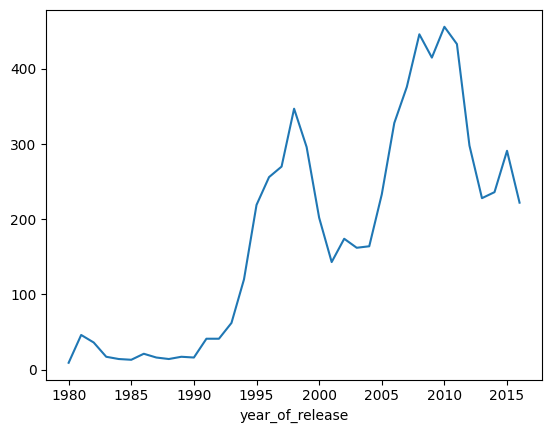

In [201]:
games_df['rating'].isna().groupby(games_df['year_of_release']).sum().plot(kind='line')

Como vemos, antes del año 1993, los valores suelen estar muy próximos a cero, lo que nos indicaría que quizá, la práctica de evaluar u otorgar un rating a los videojuegos era inexistente.

#### user_score

In [202]:
games_df['user_score'].count()

10014

In [203]:
display(games_df['user_score'].value_counts().head())

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: count, dtype: int64

Ahora bien, si analizamos un poco más la columna user_score para entender qué tipo de valores nulos tenemos, el resultado nos muestra 2424 valores 'tbd' - to be determined. Esto pudiese sugerir que el video juego no cuenta con puntuaciones de usuario, o bien, que el juego es de muy reciente creación, etc. Sin embargo, aunque estas puntuaciones no se tienen en este momento se ha decidido que no deben descartarse / eliminarse por la misma razón que en la columna rating.

Ahora, si añadimos el mismo ejercicio en el que tratamos de observar el comportamiento de la columna user_score  a lo largo de los años notaremos que siguen exactamente la misma tendencia que rating. Es decir, para antes de 1992 casi no había puntajes, lo cual nos hace pensar que esta práctica no existía y que no es hasta después de ese año en que paulatinamente empieza a incrementarse.

<Axes: xlabel='year_of_release'>

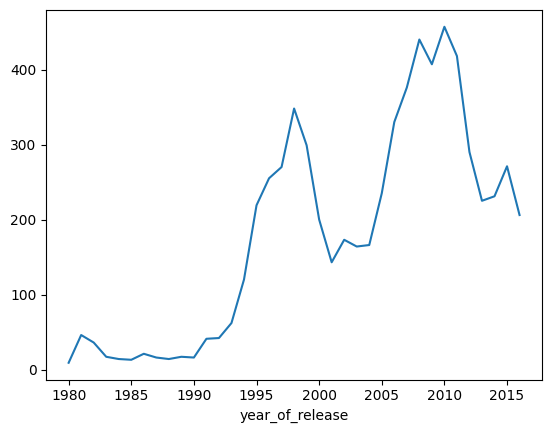

In [204]:
games_df['user_score'].isna().groupby(games_df['year_of_release']).sum().plot(kind='line')


Como no podemos transformar datos de tipo object a tipo float si estos contienen datos nulos o, como en este caso: tbd; primero debemos determinar cuál será el tratamiento de los mismos. 

Una opción pudiese ser el reemplazar definitivamente los valores tbd por 0, lo cual, significaría alterar los resultados de los datos. Esto podría interpretarse no como una falta o ausencia de calificaciones de parte del usuario, sino que el usuario calificó y el puntaje obtenido fue de 0.

Como alternativa, se plantea el transformar los datos tbd otorgándoles un valor numérico pero creando una nueva columna: primero transformamos los tbd a 0 creando la columna user_score_w_0 para poder trabajar con esta información sin perder la data original. Posteriormente calculamos la mediana de la nueva columna user_score_w_0, la cual consideramos puede ser una alternativa para trasformar los datos en otra nueva columna: user_score_w_median sin modificar la columna original.

In [205]:
games_df['user_score'].isna().sum()

6701

In [206]:
games_df['user_score'].value_counts(ascending=False)

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Tenemos 2424 valores 'tbd'.

In [207]:
games_df['user_score'].isna().sum()

6701

In [208]:
2424 + 6701

9125

En total, tenemos 9125 valores nulos lo que dificulta mucho el análisis de los datos.

<Axes: >

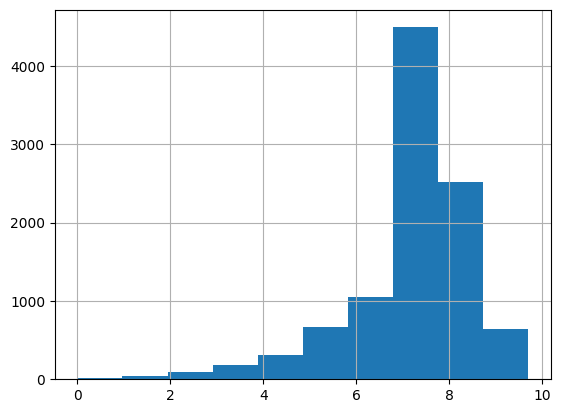

In [209]:
games_df['user_score_fixed'] = np.where(
games_df['user_score'] == 'tbd', 
games_df[games_df['user_score'] != 'tbd']['user_score'].astype('float').mean(),
games_df['user_score']
)
games_df['user_score_fixed'] = games_df['user_score_fixed'].astype('float')
games_df['user_score_fixed'].hist()

In [210]:
#games_df['user_score_fixed'] = np.where(
#games_df['user_score'] == 'tbd', 
#np.nan,
#games_df['user_score']
#)

In [211]:
games_df['user_score_fixed'].describe()

count    10014.000000
mean         7.125046
std          1.305880
min          0.000000
25%          6.800000
50%          7.125046
75%          8.000000
max          9.700000
Name: user_score_fixed, dtype: float64

Se crea una nueva columna en la que se han reemplazado los tbd con la media.

#### Valores nulos.

Como conclusión respecto al tratamiento de los valores nulos en la base de datos, se prefirió no eliminar los valores nulos debido a  las siguientes razones:

1. Hay una cantidad muy muy grande y significativa de datos que poseen valores nulos en las columnas critic_score, user_score y rating, y el eliminarlos pudiese alterar de manera relevante las conclusiones derivadas de los datos. La eliminación de todos ellos supone perder una cantidad muy significativa de los datos, simplemente no es deseable.

2. La distribución de los datos para estas columnas, muestra que en general, los datos ausentes se encuentran mayormente en datos que preceden al año 1993, lo cual, de mantenerse así nos permite visibilizar que antes de esta fecha posiblemente no existia el sistema de calificación de los juegos, y que para el consumidor esta no era una parte fundamental de su decisón de compra.  Tener presente este elemento frente a la toma de decisiones o eliminar los datos previos a 1993 es mucho más manejable.

Si deseamos eliminar los datos previos o iguales a 1993, lo más recomendable sería la creación de una nueva columna:'released' en la que 'year_of _release' se transforma a dato datetime, para así darnos más opciones para utilizarlo y evitar perder la data original.

In [212]:
games_df['released'] = pd.to_datetime(games_df['year_of_release'], format= "%Y")

#### name

In [213]:
games_df['name'].count()

16713

Identificaremos cuántos valores o nombres únicos, y cuántos valores repetidos de nombres de juegos existen en la base de datos.

In [214]:
games_df['name'].nunique()

11559

In [215]:
games_df['name'].duplicated().sum()

5155

Continuando con la exploración de datos encontramos que tenemos 5155 nombres o títlos de juegos duplicados, sin embargo, esto tiene sentido puesto que cada juego pudiera estar disponible en múltiple plataformas; por lo cual se sugiere dejar sin modificaciones.

#### Calculamos las ventas totales (la suma de las ventas en todas las regiones) para cada juego, y colocamos estos valores en una columna separada: total_sales.

In [216]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

In [217]:
display(games_df.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_fixed,released,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,2006-01-01,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1985-01-01,40.24


In [218]:
games_df['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Considerando todas las plataforma en nuestra base de datos, el juego con el máximo de ventas tiene 1062,33 (millones), mientras tanto, el que menos ventas tuvo muestra un total de 0.03.

# 3.  Analiza los datos.

#### ¿Cuántos juegos fueron lanzados en diferentes años?

<Axes: xlabel='released'>

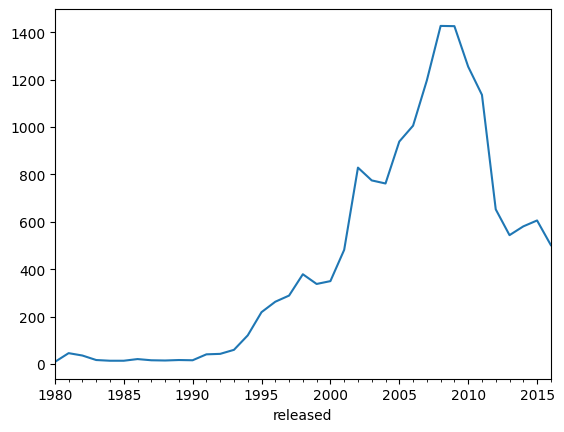

In [219]:
games_df.groupby('released')['name'].count().plot(kind='line')

Aquí podemos ver la evolución del mercado de videojuegos, desde la creación de los primeros juegos y consolas en los años ochenta, muy pocos juegos eran lanzados al mercado. Lo cual los vuelve poco signficativos para la toma de decisiones actuales.

#### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

0.7.1. Como primer paso osbervaremos las  ventas totales para todas las plataformas.

<Axes: xlabel='released'>

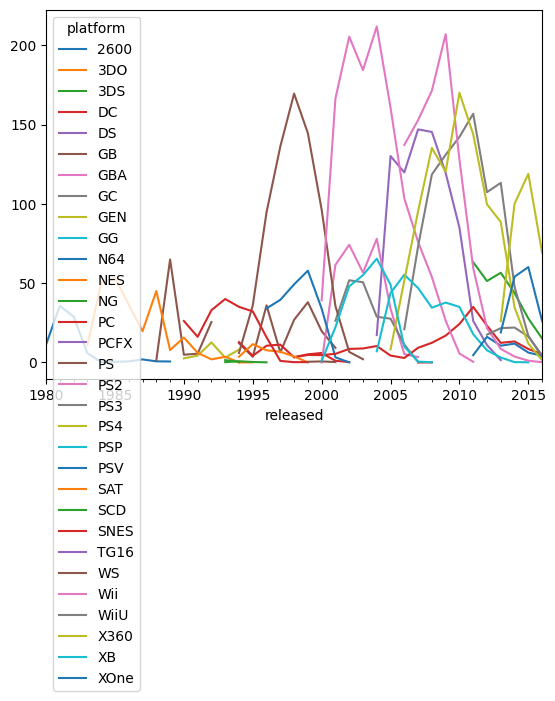

In [220]:
games_df.pivot_table(index="released", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

In [221]:
games_df['platform'].nunique()

31

Considerando las 31 plataformas en nuestra base de datos, la plataforma con el máximo de ventas tiene 1062,33 (millones), mientras que la plataforma que menos ventas tuvo muestra un total de 0.03. Arriba odemos observar que, sería PS2 la que tiene más ventas. 

* Cerraremos un poco el scope para ubicar a las 15 plataformas con más ventas.

In [222]:
top_15_plat = games_df.groupby('platform')['total_sales'].sum().sort_values().tail(15)                                                                             

In [223]:
display(top_15_plat)

platform
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

La lista de las 15 plataformas que han acumulado más ventas a lo largo de la historia, como ya vimos, es encabezada por Play Station 2, seguida por Xbox 360, mientras que en su posición más baja se encuentra Nintendo 64.

* ¿Cómo varían las ventas? Las ventas parecen tener un punto máximo de ventas y luego un descenso que se asocia a la introducción de una nueva plataforma.

0.7.2. Como segundo paso identificaremos cuáles son las plataformas con más ventas.

Dedicidmos identificar las 5 plataformas más populares a lo largo de los años. 

In [224]:
top_sales_plat = list(games_df.groupby('platform')['total_sales'].sum().sort_values().tail(5).index)

<Axes: title={'center': 'Top 5 sales platforms'}, xlabel='released'>

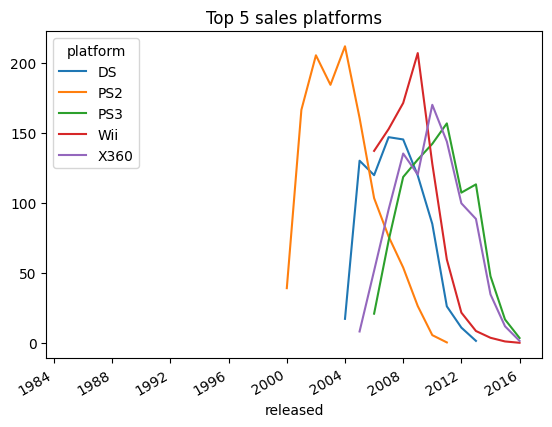

In [225]:
top_sales_plat = list(games_df.groupby('platform')['total_sales'].sum().sort_values().tail(5).index)

(
    games_df[games_df['platform'].isin(top_sales_plat)]
    .pivot_table(index='released',
                 columns= 'platform',
                 values='total_sales',
                 aggfunc='sum',
                 )
    .plot(kind='line',
          title='Top 5 sales platforms')

)

 Como resultado podemos observar que las 5 plataformas con más ventas históricamente son aquellas que se desarrollaron después del año 2000.

* Es importante poder visualizar estos datos pues, el gráfico de ventas totales de todas las plataformas así como este que identifica a las top 5, nos ayudan a responder la pregunta sobre las plataformas que solían ser populares y que ahora no tienen ventas. Como mencionamos, la primer consola de Nintendo y GameBoy eran claramente las favoritas entre 1984 y 1992, sin embargo; apenas dos años después de su caída en ventas, ya tenemos una nueva favorita, Play Station.

In [226]:
top_5_sales = games_df.groupby('platform')['total_sales'].sum().sort_values().tail(5)

In [227]:
display(top_5_sales)

platform
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

In [228]:
top_5_sales.describe()

count       5.000000
mean      976.094000
std       168.198991
min       806.120000
25%       907.510000
50%       939.650000
75%       971.420000
max      1255.770000
Name: total_sales, dtype: float64

Si consideramos las plataformas que conforman el top 5 de ventas, podemos considerar que estas presentan una media de 976.094 (millones) de ventas, con un mínimo de ventas totales de 806.12(millones) y un máximo de 1255.77. 

¿Cuáles son las plataformas que solían ser populares pero que ahora no tienen ventas? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Como podemos observar, dentro de la lista de las 15 plataformas que más ventas han registrado a lo largo de los años, así como en el gráfico de ventas totales para todas las plataformas; NES y Game Boy, dominaron el mercado/registraron sus mayores ventas antes de 1992, donde comienzan a desaparecer; dando lugar a las plataformas con más ventas históricas (al menos en esta base de datos) con un despegue de sus ventas después de los años 1993 - 1994.

0.7.3. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


Si decidieramos eliminar los datos de videojuegos lanzados antes de 1993, la siguiente sería la información a eliminar, equivalente a 365 juegos.

In [229]:
games_before_93 = games_df.query("released <= '1993-01-01'")

games_before_93.count()

name                365
platform            367
year_of_release     367
genre               365
na_sales            367
eu_sales            367
jp_sales            367
other_sales         367
critic_score          3
user_score            3
rating                4
user_score_fixed      3
released            367
total_sales         367
dtype: int64

In [230]:
games_after_93 = games_df.query("released > '1993-01-01'")
games_after_93.groupby(["released", "platform"])["total_sales"].sum().reset_index()


,released,platform,total_sales
0,1994-01-01,3DO,0.02
1,1994-01-01,GB,12.18
2,1994-01-01,GEN,8.13
3,1994-01-01,NES,0.11
4,1994-01-01,NG,0.80
...,...,...,...
192,2016-01-01,PSV,4.25
193,2016-01-01,Wii,0.18
194,2016-01-01,WiiU,4.60
195,2016-01-01,X360,1.52


In [231]:
games_after_93.groupby(["released", "platform"])["total_sales"].sum().reset_index().tail(3)

,released,platform,total_sales
194,2016-01-01,WiiU,4.60
195,2016-01-01,X360,1.52
196,2016-01-01,XOne,26.15


Como hemos podido observar en los gráficos anteriores, la cantidad de juegos previos a 1993 son mucho menores en comparación a los presentes en el mercado contemporáneo, además las plataformas ya no existen, es decir, no compiten en el mercado actual por lo cual podemos prescindir de dichos datos. Para conocer el aproximado de datos que estaríamos dejando fuera, haremos lo siguiente:

0.7.4. Elige las plataformas con las mayores ventas totales y onstruye una distribución basada en los datos de cada año.

#### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

###  Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

In [232]:
sales_by_plat = list(games_df.groupby('platform')['total_sales'].sum().sort_values().tail(10).index)
print(type(sales_by_plat))

<class 'list'>


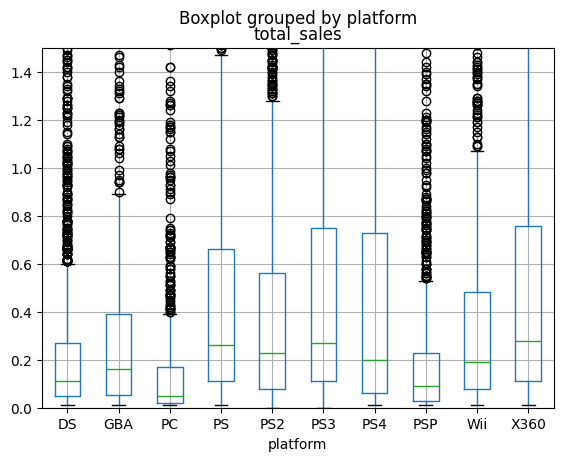

In [233]:
games_df[games_df['platform'].isin(sales_by_plat)][['total_sales','platform']].boxplot(
    column='total_sales',
    by='platform', 
)
plt.ylim(0,1.5)
plt.show()

In [234]:
top_10_sales = games_df.groupby('platform')['total_sales'].sum().sort_values().tail(10)

In [235]:
top_10_sales.describe()

count      10.000000
mean      679.689000
std       356.662719
min       259.520000
25%       315.067500
50%       768.490000
75%       931.615000
max      1255.770000
Name: total_sales, dtype: float64

<Axes: title={'center': 'Nintendo platforms sales'}, xlabel='released'>

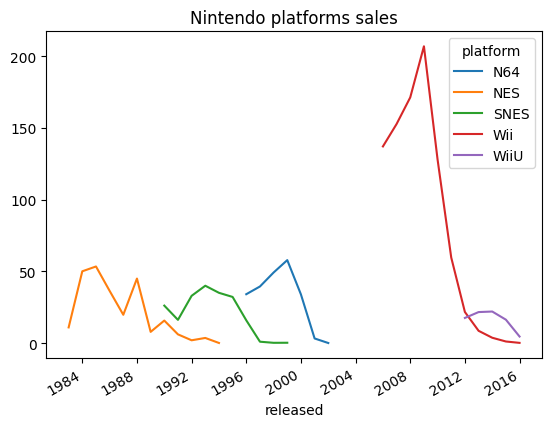

In [236]:
nintendo = ["NES", "SNES", "N64", "Wii", "WiiU"]
(
games_df[games_df['platform'].isin(nintendo)]
.pivot_table(index='released',
             columns='platform',
             values='total_sales',
             aggfunc='sum')
.plot(kind='line',
      title="Nintendo platforms sales")
                                                            
)

 ¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección)?
 

In [237]:
games_after_93.query("platform == 'Wii'")[["critic_score","total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.177907
total_sales,0.177907,1.000000


In [238]:
games_after_93.query("platform == 'Wii'")[["critic_score","total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.177907
total_sales,0.177907,1.000000


<Axes: title={'center': 'Critic score - total sales relation '}, xlabel='critic score', ylabel='total_sales'>

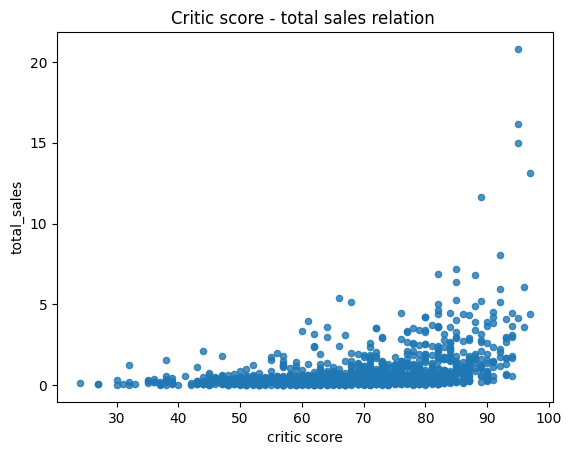

In [239]:
games_after_93.query("platform == 'PS2'").plot(x='critic_score', 
                    y= 'total_sales', 
                    kind= 'scatter', 
                    alpha= 0.8,
                    xlabel="critic score",
                    ylabel='total_sales',
                    title= 'Critic score - total sales relation ',
                    )

In [240]:
games_after_93.groupby('name')['platform'].nunique().sort_values(ascending=False)

name
Need for Speed: Most Wanted            10
LEGO Marvel Super Heroes                9
FIFA 14                                 9
Ratatouille                             9
The LEGO Movie Videogame                8
                                       ..
Inazuma Eleven Strikers                 1
Inazuma Eleven Strikers 2012 Xtreme     1
Incredible Crisis                       1
Independence Day                        1
¡Shin Chan Flipa en colores!            1
Name: platform, Length: 11118, dtype: int64

<Axes: title={'center': 'Ratatouille sales across platforms'}, xlabel='platform'>

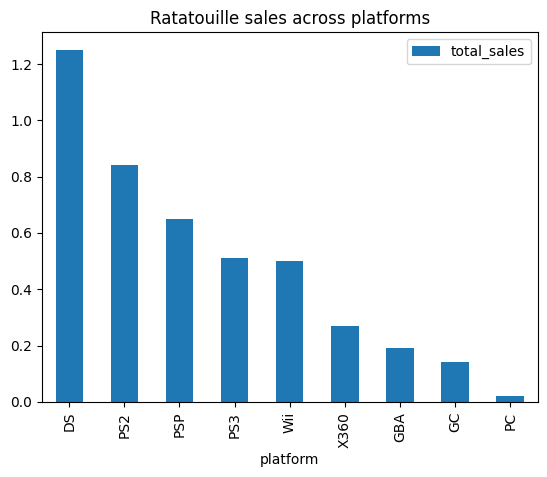

In [241]:
games_after_93.query("name == 'Ratatouille'")[["platform","total_sales"]].plot(kind='bar',
                                                                               x='platform',
                                                                               y='total_sales',
                                                                               title='Ratatouille sales across platforms',
)

A continuación podemos ver los géneros más rentables:

In [242]:
games_after_93.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1646.62
Sports          1266.74
Shooter          976.24
Role-Playing     895.60
Misc             776.53
Racing           694.59
Platform         640.59
Fighting         411.05
Simulation       381.84
Adventure        213.99
Strategy         170.45
Puzzle           159.90
Name: total_sales, dtype: float64

Los juegos de acción, deporte y disparos son los más rentables mientras que los menos rentables son aventura, estrategia y de rompecabezas o acertijos. 

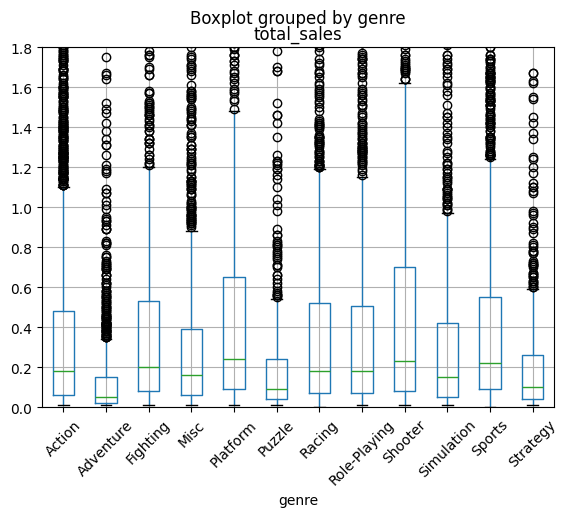

In [243]:
games_after_93.boxplot(
    column='total_sales',
    by= 'genre',
)
plt.ylim(0, 1.8)
plt.xticks(rotation=45)
plt.show()


A continuación, mostraremos el comportamiento de las ventas agrupadas por  y 

<Axes: title={'center': 'Nintendo portable platforms sales'}, xlabel='released'>

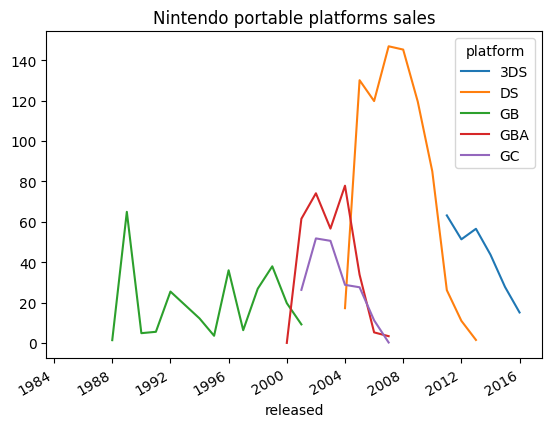

In [244]:
nintendo_portable = ["GB","GC","GBA", "DS", "3DS"]
(
games_df[games_df['platform'].isin(nintendo_portable)]
.pivot_table(index='released',
             columns='platform',
             values='total_sales',
             aggfunc='sum')
.plot(kind='line',
      title="Nintendo portable platforms sales")
                                                            
)

<Axes: title={'center': 'Xbox platforms sales'}, xlabel='released'>

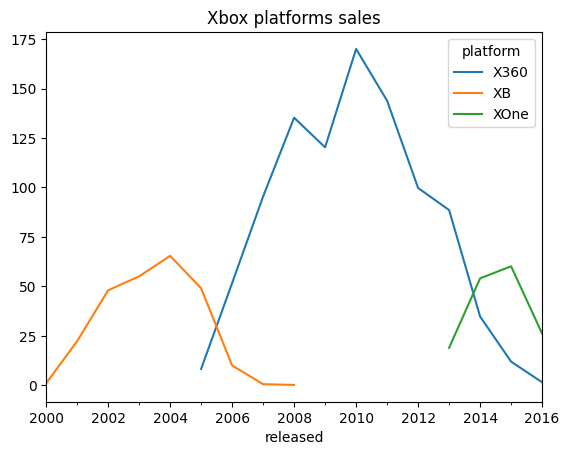

In [245]:
xbox = ["XB", "X360", "XOne"]
(
games_df[games_df['platform'].isin(xbox)]
.pivot_table(index='released',
             columns='platform',
             values='total_sales',
             aggfunc='sum')
.plot(kind='line',
      title="Xbox platforms sales")
                                                            
)

Si observamos bien el comportamiento de las ventas por plataforma podemos notar como en cuanto una nueva versión de la plataforma está disponible en el mercado, esta desplaza a la anterior y las ventas de la consola o plataforma anterior comienzan a caer, por ejemplo en el caso de Xbox, las ventas caen totalmente tres años después del  lanzamiento de su nueva plataforma.

<Axes: title={'center': 'Play Station platforms sales'}, xlabel='released'>

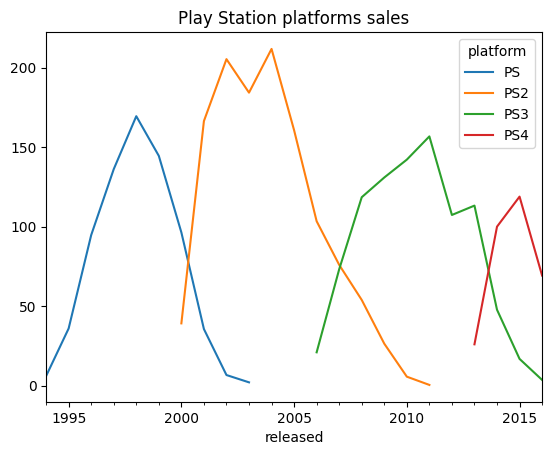

In [246]:
play_station = ["PS","PS2","PS3","PS4"]
(
games_df[games_df['platform'].isin(play_station)]
.pivot_table(index='released',
             columns='platform',
             values='total_sales',
             aggfunc='sum')
.plot(kind='line',
      title="Play Station platforms sales")
                                                            
)

<Axes: title={'center': 'Play Station portable platforms sales'}, xlabel='released'>

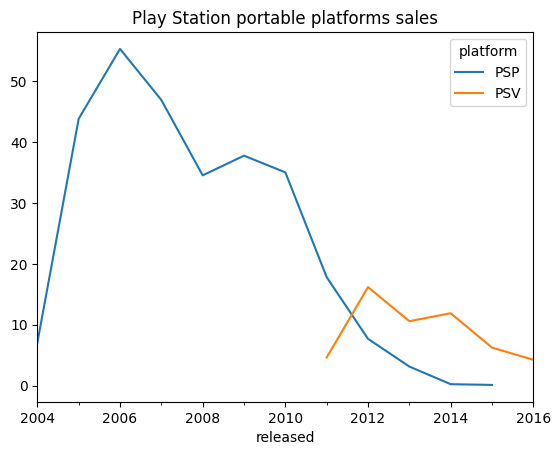

In [247]:
play_station_portable = ["PSP","PSV"]
(
games_df[games_df['platform'].isin(play_station_portable)]
.pivot_table(index='released',
             columns='platform',
             values='total_sales',
             aggfunc='sum')
.plot(kind='line',
      title="Play Station portable platforms sales")
                                                            
)

# Paso 4. Crea un perfil de usuario para cada región.


Para cada región (NA, UE, JP) determina:
Las cinco plataformas principales. Describe las variaciones en sus ¿cuotas de mercado? de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Norteamérica.

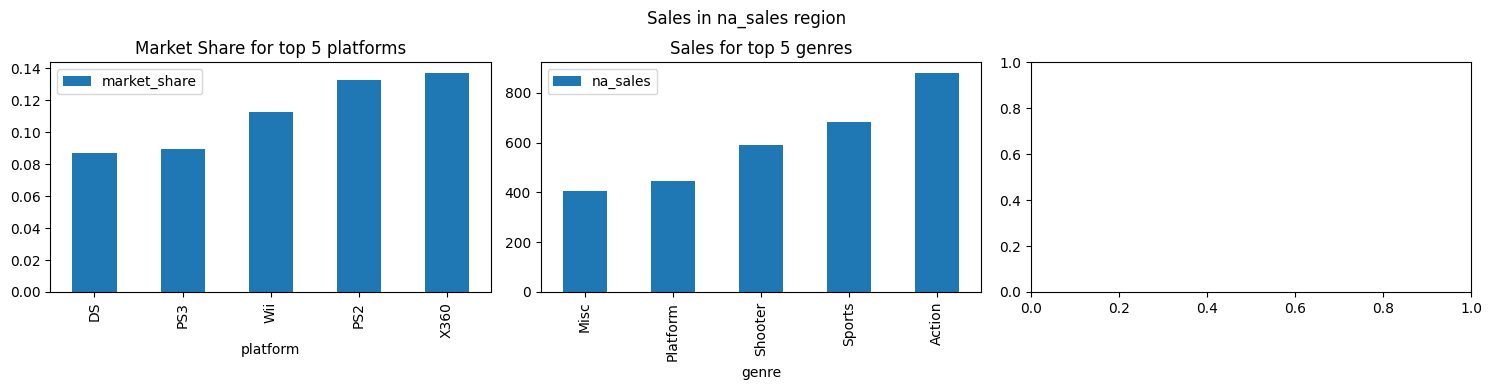

In [256]:
for region in ["na_sales"]:

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_genres = games_df.groupby("genre")[region].sum().sort_values().tail(5).reset_index()

fig.suptitle(f"Sales in {region} region", y=0.96)

axes[0].set_title("Market Share for top 5 platforms")
top_5_plat.plot(kind="bar", x="platform", y="market_share", ax=axes[0])

axes[1].set_title("Sales for top 5 genres")
top_5_genres.plot(kind="bar", x="genre", y=region, ax=axes[1])

fig.tight_layout(pad=1)

Para Norteamérica las 5 consolas o plataformas más importantes en orden ascendente son: DS, PS3, Wii, PS2 y X360. Mientras que los géneros que concentran la mayor cantidad de ventas son: miscellaneous, platform, shooter, sports y action.

In [258]:
na_region = 'na_sales'
sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_plat

,platform,na_sales,market_share
0,DS,382.40,0.086863
1,PS3,393.49,0.089382
2,Wii,496.90,0.112872
3,PS2,583.84,0.132620
4,X360,602.47,0.136852


Las ventas de DS representan el 8.68% del mercado norteamericano, PS3 un 9.93%, Wii tiene un 11.28% de las ventas de la región, PS2  el 13.26%, y X360 ha tenido la mayoría de ventas del mercado: el 13.68%.

In [261]:
top_5_plat['market_share'].sum()

0.5585880268492964

En total, estas 5 plataformas representan un 55.85% de las ventas totales del mercado norteamericano.

### Europa.

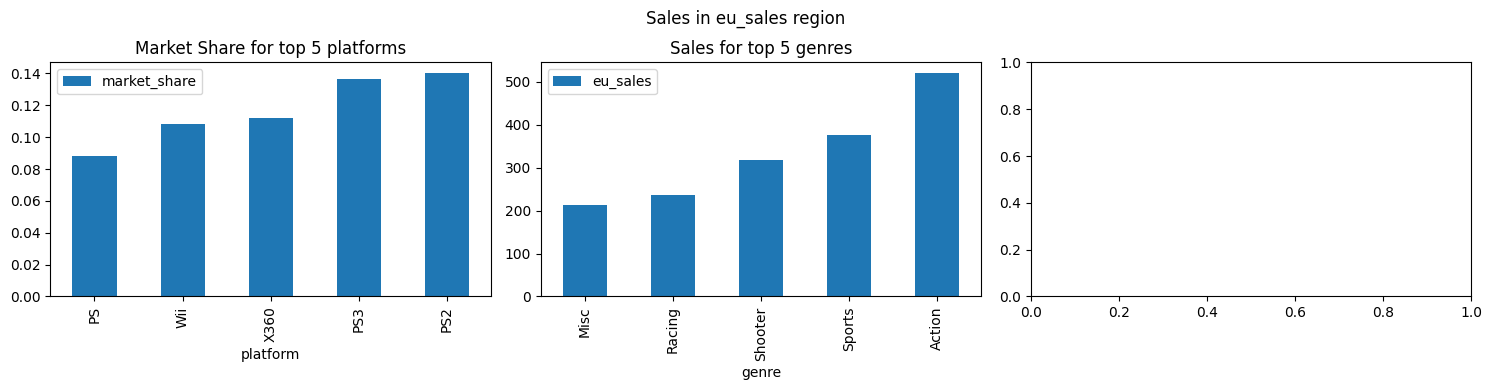

In [262]:
for region in ["eu_sales"]:

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_genres = games_df.groupby("genre")[region].sum().sort_values().tail(5).reset_index()

fig.suptitle(f"Sales in {region} region", y=0.96)

axes[0].set_title("Market Share for top 5 platforms")
top_5_plat.plot(kind="bar", x="platform", y="market_share", ax=axes[0])

axes[1].set_title("Sales for top 5 genres")
top_5_genres.plot(kind="bar", x="genre", y=region, ax=axes[1])

fig.tight_layout(pad=1)

Para Europa el top de ventas de plataformas lo constituyen PS, Wii, X360, PS3 y PS2, nuevamente en orden ascendente, es decir, donde PS2 es la plataforma con más ventas en todo Europa. En el caso de los 5 géneros más gustados están misc, racing, shooter, sports, action.

In [264]:
eu_region = 'eu_sales'
sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_plat

,platform,eu_sales,market_share
0,PS,213.61,0.088099
1,Wii,262.21,0.108143
2,X360,270.76,0.111669
3,PS3,330.29,0.136221
4,PS2,339.29,0.139932


En Europa, PS representa el 8.80% de las ventas, por su parte, Wii equivale al 10.81% de las ventas,  X360 tiene el 11.16% del mercado, PS3 tiene un 13.62% de las ventas en el mercado europeo y el top de ventas es de PS" con 13.99% de participación.

In [265]:
top_5_plat['market_share'].sum()

0.5840629858908635

En total, estas 5 plataformas representan 58.4% del mercado europeo.

### Japón.

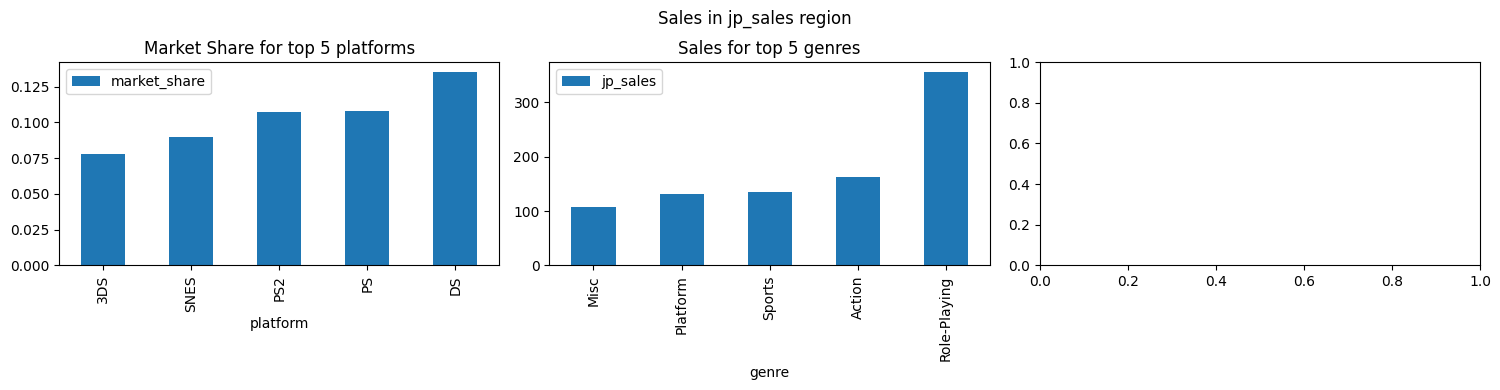

In [266]:
for region in ["jp_sales"]:

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_genres = games_df.groupby("genre")[region].sum().sort_values().tail(5).reset_index()

fig.suptitle(f"Sales in {region} region", y=0.96)

axes[0].set_title("Market Share for top 5 platforms")
top_5_plat.plot(kind="bar", x="platform", y="market_share", ax=axes[0])

axes[1].set_title("Sales for top 5 genres")
top_5_genres.plot(kind="bar", x="genre", y=region, ax=axes[1])

fig.tight_layout(pad=1)

    
En el caso de Japón, entre  las 5 consolas o plataformas más vendidas están 3DS, SNES, PS2, PS, DS. Es decir la plataforma más vendida en Japón hasta 2016 ha sido DS, y los géneros prferidos por los consumidores son misc, platform, sports, action y role-playing.

In [267]:
eu_region = 'eu_sales'
sales_by_plat = games_df.groupby("platform")[region].sum()
top_5_plat = sales_by_plat.sort_values().tail(5).reset_index()
top_5_plat["market_share"] = top_5_plat[region] / sales_by_plat.sum()

top_5_plat

,platform,jp_sales,market_share
0,3DS,100.67,0.077595
1,SNES,116.55,0.089836
2,PS2,139.20,0.107294
3,PS,139.82,0.107772
4,DS,175.57,0.135328


En Japón, 3DS posee el 7.75% del total de ventas, SNES el 8.98%, PS2 posee 10.72% del mercado, mientras que PS cuenta con 10.77% y DS, tiene la mayoría con 13.53%.

In [268]:
top_5_plat['market_share'].sum()

0.5178245219174175

Entre las 5 plataformas más vendidas en Japón poseen el 51.78% de las ventas de dicho mercado.

### ¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?

In [270]:
games_df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Como podemos observar hay ratings que apenas registran algunos juegos disponibles en el mercado, lo que pudiese sugerirnos que realmente no hay una alta demanda de dichos ratings, y por lo tanto ventas asociadas a estos. Los ratings de los que hablamos son: EC , K-A, RP, AO. Mientras que las ventas se concentran en los ratings E, T, M y E10+.

In [277]:
games_df["rating_cut"] = np.where(
    games_df["rating"].isin(["EC", "K-A", "RP", "AO"]),
    "Other",
    games_df["rating"]
)

games_df["rating_cut"].value_counts()

rating_cut
E        3990
T        2961
M        1563
E10+     1420
Other      15
Name: count, dtype: int64

Ya agrupados vemos que los ratings mencionados apenas sumanron 15 juegos.

# Paso 5. Prueba las siguientes hipótesis:


Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Si asumimos que los promedios de la calificaciones de los usuarios son iguales para Xbox One y PC, 

In [279]:
games_df['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [284]:
from scipy.stats import levene

statistic, p_value = levene(
    games["eu_sales"],
    games["na_sales"],
)

p_value

ModuleNotFoundError: No module named 'scipy'

Cuando el valor p es muy pequeño rechazamos la hipótesis nula.

Veremos la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [252]:
#games_df.pivot_table(index='released', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line')

In [253]:
#games_df.pivot_table(
#    index='released', 
#   columns='genre', 
#    values='critic_score', 
#   aggfunc='mean'
#    ).plot(kind='line')